In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor 
import seaborn as sns


2023-03-18 14:56:45.574845: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 14:56:45.750728: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-18 14:56:45.750754: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-18 14:56:46.887043: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [5]:
def to_float(dataset):
    new_dataset = pd.DataFrame()

    for col in list(dataset.columns):
        new_dataset[col] = dataset[col].astype(float)

    return new_dataset

In [6]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  plt.show()

In [7]:
def historize(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    return hist

In [8]:
def linear_regression_multiple_inputs(normalizer, train_features):

    linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
    ])

    print(linear_model.predict(train_features[:10]))


In [9]:
def normalize(train_features, train_labels):
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(train_features))

    print(normalizer.mean.numpy())

    first = np.array(train_features[:1])

    with np.printoptions(precision=2, suppress=True):
        print('First example:', first)
        print()
        print('Normalized:', normalizer(first).numpy())

    H1006 = np.array(train_features['H1006'])

    h1006_normalizer = layers.Normalization(input_shape=[1,], axis=None)
    h1006_normalizer.adapt(H1006)

    h1006_model = tf.keras.Sequential([
    h1006_normalizer,
    layers.Dense(units=1)
    ])

    h1006_model.summary()

    print(h1006_model.predict(H1006[:10]))


    h1006_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

    history = h1006_model.fit(
    train_features['H1006'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

    historize(history)
    plot_loss(history)

    return normalizer

In [2]:
PARQUET = "NORWAY_INFLOW_2018-2022.parquet"
CSV = "parquet.csv"

/tmp/ipykernel_56534/3925660921.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataset[col] = dataset[col].astype(float)
/tmp/ipykernel_56534/3925660921.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataset[col] = dataset[col].astype(float)
/tmp/ipykernel_56534/3925660921.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

[[2.01993787e+03 2.59282303e+01 2.02019703e+05 2.91029816e+01
  4.76773834e+02 1.23635246e+02 5.47640259e+02 7.06639481e+01
  1.21775795e+02 6.55781921e+02 1.03713882e+02 1.89014191e+02
  2.34672455e+02 2.40398956e+02 6.07899714e+00 1.88995911e+02
  6.37885132e+02 1.18724503e+02 3.25313867e+03 9.34365906e+02
  9.92728348e+01 8.45286102e+01 3.63194678e+03 3.63148706e+03
  8.86547699e+01 7.29011765e+01 7.41222839e+01 5.21910858e+01
  3.75984344e+02 8.17327393e+02 4.07278229e+02 1.63828705e+02
  1.17730469e+02 3.03849823e+02 3.82329590e+02 2.27347610e+02
  1.07183081e+03 5.19754639e+01 1.40019604e+03 3.03773590e+02
  6.29904907e+02 6.37885132e+02 1.42759903e+02 1.21775795e+02
  1.72691162e+02 9.34365906e+02 9.91029434e+01 9.18205383e+02
  6.94219208e+01 1.12098730e+03 3.57196655e+02 7.37195251e+02
  3.13842407e+02 2.24639606e+01 1.25386856e+02 5.33065674e+02
  2.54094200e+01 1.20468292e+02 7.23531723e+01 3.07043343e+01
  5.04546936e+02 4.21099091e+00 1.33913892e+03 5.21372131e+02
  2.0088

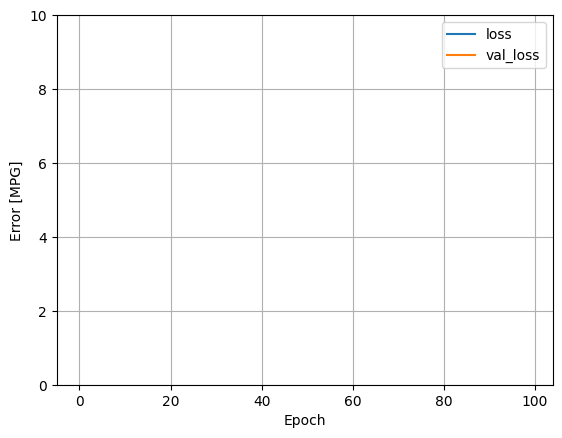

In [11]:
    df = pd.read_csv(CSV)
    df = to_float(df)

    #prepare train test dataset
    train_dataset = df.sample(frac=0.8, random_state=0)
    test_dataset = df.drop(train_dataset.index)

    train_features = train_dataset.copy()
    test_features = test_dataset.copy()

    train_labels = train_features.pop('entsoe_inflow')
    test_labels = test_features.pop('entsoe_inflow')

    train_dataset.describe().transpose()[['mean', 'std']]

    normalizer  = normalize(train_features, train_labels)

    linear_regression_multiple_inputs(normalizer, train_features)




In [ ]:
df2 = pd.concat([df.pop(x) for x in ['c', 'd']], axis=1)


In [12]:
train_dataset.describe().transpose()[['mean', 'std']]


,mean,std
year,2.019938e+03,1.400878e+00
week,2.592823e+01,1.542568e+01
entsoe_inflow,2.479748e+06,1.764955e+06
time_id,2.020197e+05,1.410575e+02
H1006,2.910298e+01,4.997846e+01
...,...,...
H985,1.029014e+02,1.045101e+02
H989,3.819482e+02,1.756452e+02
H99,8.049682e+00,5.404308e+00
H994,1.663627e+03,6.376714e+02
